# **Lab Project Part 2 - CNNs for Image Classification**
------------------------------

### General Guideline
1. **Aim**:
    - *Understand  the  basic  Image  Classification/Recognition  pipeline  and  the  data-driven  approach (train/predict stages).*
    - *Get used to one of deep learning framework(PyTorch).*
2. **Prerequisite**:
    - *Familiar with python and relevant packages.*
    - *Known the basic knowledge of Convolutional Neural Networks*
3. **Guidelines**:
    Students should work on the assignments in a group of *three person* for two weeks. Some minor additions and changes might be done during these three weeks. Students will be informed for these changes via Canvas. Any questions regarding the assignment content can be discussed on Piazza. Students are expected to do this assignment in Python and Pytorch, however students are free to choose other tools (like Tensorflow). Your source code and report must be handed in together in a zip file (*ID1_ID2_ID3.zip*) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given script and answer all given questions (in green boxes). Briefly describe what you implemented. Blue boxes are there to give you hints to answer questions.*
    - *Analyze your results and discuss them, e.g.*, why algorithm A works better than algorithm B in a certain problem.
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*
4. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
5. **Plagiarism note**: 
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.

### PyTorch versions
we assume that you are using the latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** If you want to run the notebook locally, we recommend installing *anaconda* for configuring *python* package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***: What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
<!-- You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

##  **Introduction**

This part of the assignment makes use of Convolutional Neural Networks (CNN). The previous part makes use of hand-crafted features like SIFT to represent images, then trains a classifier on top of them. In this way, learning is a two-step procedure with image representation and learning. The method used here instead *learns* the features jointly with the classification. Training CNNs roughly consists of three parts:  (i) Creating the network architecture, (ii) Reprocessing the data, (iii) Feeding the data to the network, and updating the parameters. Please follow the instruction and finish the below tasks. (**Note:**  **Feel free to change the provided codes**.)

## **Session 1: Image Classifiation on CIFAR-100**
### 1.1 Install pytorch and run the given codes

First of all, you need to install PyTorch and relevant packages. In this session, we will use [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) as the training and testing dataset. 

In [1]:
#####################################################
# referenced codes: https://pytorch.org/tutorials/
# referenced codes: http://cs231n.stanford.edu/
# referenced codes: https://cs.stanford.edu/~acoates/stl10/
######################################################
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

from torch.utils.data import random_split
import pandas as pd
import json
from tqdm import tqdm
import copy

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
torch.cuda.is_available()

True

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('apple', 'aquarium_fish', 'baby','bear', 'beaver','bed','bee','beetle','bicycle','bottle', 'bowl','boy','bridge', 'bus','butterfly', 'camel','can','castle','caterpillar','cattle',
 'chair','chimpanzee','clock','cloud', 'cockroach','couch', 'cra','crocodile', 'cup','dinosaur','dolphin', 'elephant','flatfish', 'forest', 'fox','girl', 'hamster', 'house','kangaroo','keyboard',
'lamp', 'lawn_mower', 'leopard', 'lion','lizard','lobster', 'man','maple_tree','motorcycle', 'mountain', 'mouse','mushroom','oak_tree', 'orange','orchid', 'otter', 'palm_tree','pear', 'pickup_truck','pine_tree',
'plain', 'plate', 'poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea', 'seal', 'shark','shrew', 'skunk','skyscraper', 'snail','snake','spider',
'squirrel', 'streetcar', 'sunflower','sweet_pepper', 'table','tank','telephone', 'television', 'tiger','tractor','train','trout', 'tulip', 'turtle','wardrobe', 'whale', 'willow_tree','wolf', 'woman','worm')

Files already downloaded and verified


####  **` Q1.1: test dataloader and show the images of each class  of CIFAR-100 (3-pts)`**  
You need to run and modify the given code and **show** the example images of CIFAR-100, **describe** the classes and images of CIFAR-100. (Please visualize at least one picture for the classes of labels from 0 to 4.) (3-*pts*)

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

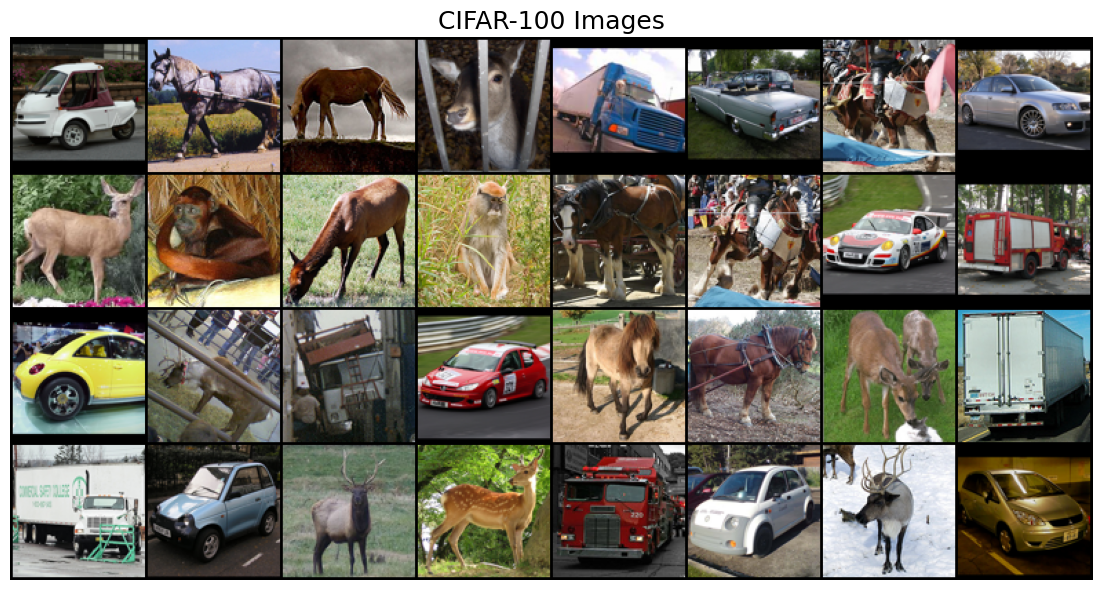

In [157]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
# fig, ax = plt.subplots(figsize=(16,9))
# ax.imshow(torchvision.utils.make_grid(images))

fig, ax = plt.subplots(figsize=(12,6))
plt.axis('off')
ax.axis('off')
ax.set_title("CIFAR-100 Images",fontdict=dict(size=18))

img = torchvision.utils.make_grid(images[:32], normalize=True)
img = np.transpose(img, (1, 2, 0)) # Shape (3, 100, 492) -> (100, 492, 3)
ax.imshow(img)
fig.tight_layout()
fig.savefig("CIFAR-100 Images.png",bbox_inches = 'tight')


### 1.2 Architecture understanding

In this section, we provide two wrapped classes of architectures defined by *nn.Module*. One is an ordinary two-layer network (*TwolayerNet*) with fully connected layers and ReLu, and the other is a Convolutional Network (*ConvNet*) utilizing the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791).

####  **`Q1.2: Architecture understanding. Implement architecture of TwolayerNet and ConvNet (4-pts).`**
1. Complement the architecture of *TwolayerNet* class, and complement the architecture of *ConvNet* class using the structure of LeNet-5. (2-*pts*)
2. Since you need to feed color images into these two networks, what's the kernel size of the first convolutional layer in *ConvNet*? and how many trainable parameters are there in "F6" layer (given the calculation process)? (2-*pts*)

In [6]:
class TwoLayerNet(nn.Module):
    # assign layer objects to class attributes
    # nn.init package contains convenient initialization methods
    # http://pytorch.org/docs/master/nn.html#torch-nn-init
    def __init__(self, input_size, hidden_size, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        # flatten
        x = x.view(x.shape[0], -1)
        scores = F.relu(self.fc1(x))
        scores = self.fc2(scores)
        return scores


In [7]:
class TwoLayerNetPlus(TwoLayerNet):
    def __init__(self, input_size, hidden_size, hidden_size2, hidden_size3, num_classes):
        '''
        :param input_size: 3*32*32
        :param hidden_size: 
        :param num_classes: 
        '''
        super().__init__(input_size, hidden_size, num_classes)
        
        self.fc1 = nn.Sequential(nn.Linear(input_size, hidden_size),
                                nn.Linear(hidden_size, hidden_size2),
                                nn.Linear(hidden_size2, hidden_size3))
        self.fc2 = nn.Linear(hidden_size3, num_classes)

In [172]:
### NOTE: For simplicity, you can use nn.tanh as the activation function and output the 1x10 length logits directly (omit the RBF units output).
class ConvNet(nn.Module):
    # Complete the code using LeNet-5
    # reference: https://ieeexplore.ieee.org/document/726791
    def __init__(self, input_channels, classes, init_padding = (0,0)):
        super().__init__()
        
        self.conv1 = nn.Sequential(
                    nn.Conv2d(input_channels, 6, kernel_size=5, padding=init_padding),
                    nn.BatchNorm2d(6),
                    nn.ReLU())
        self.subsamp1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        
        self.conv2 = nn.Sequential(
                    nn.Conv2d(6,16, kernel_size=5),
                    nn.BatchNorm2d(16),
                    nn.ReLU())
        self.subsamp2 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        
        self.fc1 = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(400, 120),    # 16*(5*5) = 400
                    nn.ReLU())
        
        self.fc2 = nn.Sequential(
                    nn.Linear(120, 84),
                    nn.ReLU())       
        
        self.fc3 = nn.Linear(84, classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.subsamp1(x)
        x = self.conv2(x)
        x = self.subsamp2(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [9]:
class ConvNetPlus(ConvNet):
    def __init__(self, input_channels, classes):
        super().__init__(input_channels, classes)
        
        self.fc2 = nn.Sequential(
                    nn.Linear(120, 84),
                    nn.ReLU(),
                    nn.Linear(84,84),
                    nn.ReLU(),
                    nn.Linear(84,84),
                    nn.ReLU())

### 1.3 Preparation of training

In above section, we use the *CIFAR-100* dataset class from *torchvision.utils* provided by PyTorch. Whereas in most cases, you need to prepare the dataset yourself. One of the ways is to create a *dataset* class yourself and then use the *DataLoader* to make it iterable. After preparing the training and testing data, you also need to define the transform function for data augmentation and optimizer for parameter updating. 

####  **` Q1.3: Preparation of training. Create Dataloader yourself and define Transform, optimizer.(8-pts)`**  
1. Complement the *CIFAR100\_loader* (2-pts)
2. Complement *Transform* function and *Optimizer* (2-pts)
3. Train the *TwolayerNet* and *ConvNet* with *CIFAR100\_loader*, *Transform* and *Optimizer* you implemented and compare the results (4-pts)

##### *` Complement  CIFAR100_loader()(2-pts)`*

##### *` Complement Transform function and Optimizer (2-pts)`*

In [10]:
import io
import pickle
from PIL import Image
from torch.utils.data import Dataset, DataLoader 

def unpickle(file):
    with open(file, 'rb') as file_open:
        retrieved_file = pickle.load(file_open, encoding='latin1')
    return retrieved_file


class CIFAR100_loader(Dataset):
    def __init__(self, root, train=True, transform=None):        

        if train:
            self.data=unpickle(root+'/cifar-100-python/train')
        else:
            self.data=unpickle(root+'/cifar-100-python/test')
        
        self.targets=self.data['fine_labels']
        
        self.data=self.data['data'].reshape(-1, 3, 32, 32)
        self.data=self.data.transpose((0, 2, 3, 1))
        
        self.labels=unpickle(root+'/cifar-100-python/meta')
        self.transform=transform
    
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):

        img, target = self.data[item], self.targets[item]
        img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        return img, target

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_train = CIFAR100_loader(root='./data', train=True, transform=transform)
trainloader = DataLoader(transform_train, batch_size=64,
                                          shuffle=True)


transform_test = CIFAR100_loader(root='./data', train=False, transform=transform)
testloader = DataLoader(transform_test, batch_size=4,
                                         shuffle=False)


input_size = 3*32*32
hidden_size = 512
num_classes = 100
twoLayerNet = TwoLayerNet(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_classes=num_classes).to(device)
fourLayerNet = TwoLayerNetPlus(input_size=input_size,
                               hidden_size=256,
                               hidden_size2=128,
                               hidden_size3=128,
                               num_classes=num_classes).to(device)

input_channels = 3
convNet = ConvNet(input_channels=input_channels, 
                  classes=num_classes).to(device)
convNetPlus = ConvNetPlus(input_channels=input_channels,
                         classes=num_classes).to(device)


In [12]:
TLN_params = sum(p.numel() for p in twoLayerNet.parameters())
TLN_trainable_params = sum(p.numel() for p in twoLayerNet.parameters() if p.requires_grad)
print("Two Layer Net Total Parameters: {n}".format(n=TLN_params))
print("Two Layer Net Trainable Parameters: {n}".format(n=TLN_trainable_params))

CNN_params = sum(p.numel() for p in convNet.parameters())
CNN_trainable_params = sum(p.numel() for p in convNet.parameters() if p.requires_grad)
print("ConvNet Total Parameters: {n}".format(n=CNN_params))
print("ConvNet Trainable Parameters: {n}".format(n=CNN_trainable_params))

FLN_params = sum(p.numel() for p in fourLayerNet.parameters())
FLN_trainable_params = sum(p.numel() for p in fourLayerNet.parameters() if p.requires_grad)
print("Four Layer Net Total Parameters: {n}".format(n=FLN_params))
print("Four Layer Net Trainable Parameters: {n}".format(n=FLN_trainable_params))

CNNP_params = sum(p.numel() for p in convNetPlus.parameters())
CNNP_trainable_params = sum(p.numel() for p in convNetPlus.parameters() if p.requires_grad)
print("ConvNet Plus Total Parameters: {n}".format(n=CNNP_params))
print("ConvNet Plus Trainable Parameters: {n}".format(n=CNNP_trainable_params))

Two Layer Net Total Parameters: 1624676
Two Layer Net Trainable Parameters: 1624676
ConvNet Total Parameters: 69700
ConvNet Trainable Parameters: 69700
Four Layer Net Total Parameters: 848996
Four Layer Net Trainable Parameters: 848996
ConvNet Plus Total Parameters: 83980
ConvNet Plus Trainable Parameters: 83980


##### *` Train the TwolayerNet and ConvNet with CIFAR100_loader, transform and optimizer you implemented and compare the results (4-pts)`*

In [13]:
def valid(net,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuracy = correct/total

    print('Accuracy: %d %%' % (
            100 * correct / total))
    return accuracy

In [14]:
def valid_class(net,testloader,classes):
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    conf_matrix = np.zeros((len(classes), len(classes)), dtype=np.int)
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
                conf_matrix[label][predicted[i]] += 1

#     for i in range(len(classes)):
#         print('Accuracy of %5s : %2d %%' % (
#             classes[i], 100 * class_correct[i] / class_total[i]))
    return conf_matrix

In [15]:
def train(net, trainloader, lr=0.001, epochs=1,return_model=False):
    
    train_results = {}
    train_acc, train_loss, track_epoch = [], [], []
    
    ###################### Define Loss function and optimizer
    cost = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(net.parameters(), lr=lr)
    ############################### Training
    for epoch in range(epochs):# loop over the dataset multiple times
        
        net.train()
        for i, (images, labels) in enumerate(trainloader):
#             current_loss = 0.0
#             correct_preds = 0
#             number_labels = 0

            images = images.to(device)
            labels = labels.to(device)
            number_labels = len(labels)
            #forward pass
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            loss = cost(outputs, labels)

            #backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            current_loss = loss.item() * number_labels
            correct_preds = torch.sum((predicted == labels), axis=0).item()

            train_acc.append(correct_preds/number_labels)
            train_loss.append(current_loss/number_labels)
            track_epoch.append(epoch)
        
        train_results['train_acc'] = train_acc
        train_results['train_loss'] = train_loss
        train_results['epoch'] = track_epoch
    
    
    if return_model:
        return copy.deepcopy(net), train_results
    return train_results

*train TwolayerNet*

In [16]:
# Two Layer Network
TLN_train_results = train(twoLayerNet, trainloader, epochs=20)
TLN_train_results = pd.DataFrame.from_dict(TLN_train_results)
print(TLN_train_results.head(10))
valid(twoLayerNet, testloader)
################################
# Todo: finish the code
################################

   train_acc  train_loss  epoch
0   0.031250    4.603968      0
1   0.031250    4.593123      0
2   0.000000    4.727083      0
3   0.031250    4.831799      0
4   0.031250    4.875716      0
5   0.078125    4.600250      0
6   0.062500    4.421787      0
7   0.031250    4.662091      0
8   0.015625    4.759248      0
9   0.046875    4.760440      0
Accuracy: 22 %


0.2297

In [170]:
TLN_train_results['train_acc'].mean()

0.4409916480179028

In [18]:
# Four Layer Network
FLN_train_results = train(fourLayerNet, trainloader, epochs=20)
FLN_train_results = pd.DataFrame.from_dict(FLN_train_results)
print(FLN_train_results.head(10))
valid(fourLayerNet, testloader)

   train_acc  train_loss  epoch
0   0.015625    4.613841      0
1   0.046875    4.583359      0
2   0.000000    4.587955      0
3   0.046875    4.710123      0
4   0.031250    4.600833      0
5   0.046875    4.582852      0
6   0.000000    4.556731      0
7   0.046875    4.519889      0
8   0.015625    4.577587      0
9   0.031250    4.568053      0
Accuracy: 23 %


0.2373

In [171]:
FLN_train_results['train_acc'].mean()

0.2668338395140665

*train ConvNet*

In [20]:
# ConvNet
CNN_train_results = train(convNet, trainloader, epochs=20)
CNN_train_results = pd.DataFrame.from_dict(CNN_train_results)
print(CNN_train_results.head(10))
valid(convNet, testloader)

   train_acc  train_loss  epoch
0   0.015625    4.622935      0
1   0.015625    4.588176      0
2   0.000000    4.608875      0
3   0.015625    4.606363      0
4   0.031250    4.641100      0
5   0.015625    4.602681      0
6   0.015625    4.591456      0
7   0.031250    4.588233      0
8   0.000000    4.606205      0
9   0.000000    4.570770      0
Accuracy: 24 %


0.2475

In [168]:
CNN_train_results['train_acc'].mean()

0.34419257512787726

In [22]:
# ConvNet with 2 Extra Layers
CNNPlus_train_results = train(convNetPlus, trainloader, epochs=20)
CNNPlus_train_results = pd.DataFrame.from_dict(CNNPlus_train_results)
print(CNNPlus_train_results.head(10))
valid(convNetPlus, testloader)

   train_acc  train_loss  epoch
0   0.000000    4.610390      0
1   0.015625    4.605923      0
2   0.000000    4.623829      0
3   0.000000    4.601370      0
4   0.000000    4.615318      0
5   0.015625    4.618504      0
6   0.031250    4.609027      0
7   0.031250    4.595442      0
8   0.015625    4.612369      0
9   0.015625    4.597861      0
Accuracy: 22 %


0.2208

In [169]:
CNNPlus_train_results['train_acc'].mean()

0.2748061860613811

### 1.4 Setting up the hyperparameters

Some parameters must be set properly before the training of CNNs. These parameters shape the training procedure. They determine how many images are to be processed at each step, how much the weights of the network will be updated, how many iterations will the network run until convergence.  These parameters are called hyperparameters in the machine learning literature. 

####  **` Q1.4: Setting up the hyperparameters (10-pts)`**  

1. Play with ConvNet and TwolayerNet yourself, set up the hyperparameters, and reach the accuracy as high as you can.
You can modify the *train*,  *Dataloader*, *transform* and *Optimizer* function as you like. 
2. You can also modify the architectures of these two Nets. 

 *Let's add 2 more layers in TwolayerNet and ConvNet, and show the results. (You can decide the size of these layers and where to add them.) Will you get higher performances? explain why.*
3.  Show the final results and described what you've done to improve the results. Describe and explain the influence of hyperparameters among *TwolayerNet* and *ConvNet*.
4. Compare and explain the differences of these two networks regarding the architecture, performances, and learning rates. 

**Hint:** You can adjust the following parameters and other parameters not listed as you like: *Learning rate, Batch size, Number of epochs, Optimizer, Transform function, Weight decay etc.* You can also change the structure a bit, for instance, adding Batch Normalization layers. Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.

#### *`Play with convNet and TwolayerNet, set up the hyperparameters and reach the accuracy as high as you can`*

In [24]:
# train, dataloader (batches), transform (normalization), optimizer (SGD), loss(MSE),
# epochs(10), hidden layers
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
batches = [128, 256, 512, 1024]
input_size = 3*32*32
hidden_size = 512
num_classes = 100

RS = transforms.Resize(32)
CC = transforms.CenterCrop(32)
TT = transforms.ToTensor()
NRM = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

transform = transforms.Compose([RS,CC,TT,NRM])

transform_train = CIFAR100_loader(root='./data', train=True, transform=transform)
transform_test = CIFAR100_loader(root='./data', train=False, transform=transform)

all_results_conv = []
all_results_tln = []
for lr in tqdm(learning_rates):
    for batch in tqdm(batches):
        modelConv = ConvNet(input_channels=3,classes=100).to(device)
        modelTLN = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, 
                            num_classes=num_classes).to(device)
        trainloader = DataLoader(transform_train, batch_size=batch, shuffle=True)
        
        resultsTLN = train(modelTLN,trainloader,lr=lr,epochs=10)
        resultsTLN['LR'] = lr
        resultsTLN['Batches'] = batch
        all_results_tln.append(resultsTLN)
        
        
        results = train(modelConv,trainloader,lr=lr,epochs=10)
        results['LR'] = lr
        results['Batches'] = batch
        all_results_conv.append(results)

with open('./data' + "saved_stats_CNN.txt", "w") as f:
    for res in all_results_conv:
        f.write(json.dumps(res))
        f.write('\n')
        
with open('./data' + "saved_stats_TLN.txt", "w") as f:
    for res in all_results_tln:
        f.write(json.dumps(res))
        f.write('\n')

100%|████████████████████████████████████████████████████████████████████████████████| 4/4 [1:13:00<00:00, 1095.16s/it]


In [51]:
tuned_hyperparams_results = []
with open('./data' + "saved_stats_CNN.txt", "r") as f:
    for line in f.readlines():
        tuned_hyperparams_results.append(json.loads(line))

# Load stats in Pandas Dataframe
CNN_tuned_results = pd.DataFrame.from_dict(tuned_hyperparams_results)

In [50]:
tuned_tln_results = []
with open('./data' + "saved_stats_TLN.txt", "r") as f:
    for line in f.readlines():
        tuned_tln_results.append(json.loads(line))

# Load stats in Pandas Dataframe
TLN_tuned_results = pd.DataFrame.from_dict(tuned_tln_results)

In [70]:
CNN_tuned_results['train_acc'][-1:]


15    [0.00390625, 0.009765625, 0.005859375, 0.00683...
Name: train_acc, dtype: object

In [82]:
# TLN_tuned_results['train_acc'][0]
y = [result['train_acc'][-1] for result in tuned_tln_results if result['Batches'] == 128]
print(y)

[0.175, 0.5125, 0.3125, 0.1625]


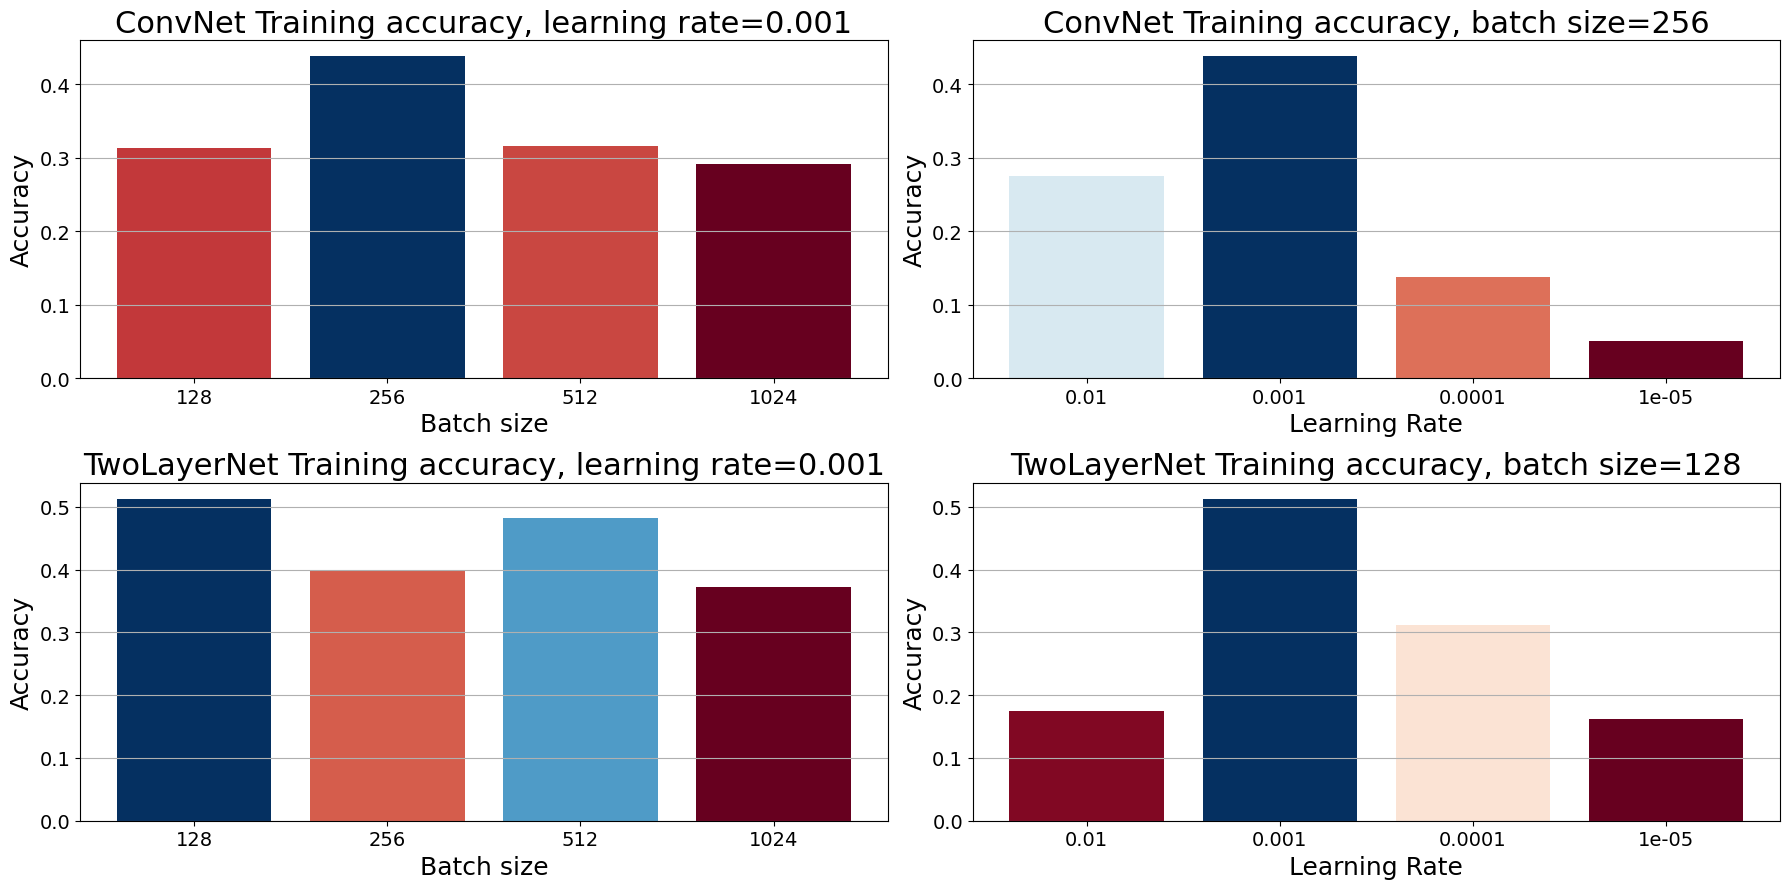

In [85]:
my_cmap = plt.get_cmap("RdBu")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))


fig, ax = plt.subplots(figsize=(18,9))
plt.axis('off')

ax = fig.add_subplot(2, 2, 1)
L=0.001
ax.set_title("ConvNet Training accuracy, learning rate={n}".format(n=L), fontdict=dict(size=22))
ax.set_xlabel("Batch size",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.grid(axis='y')
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(result['Batches']) for result in tuned_hyperparams_results if result['LR'] == L]
y = [result['train_acc'][-1] for result in tuned_hyperparams_results if result['LR'] == L]
ax.bar(x, y, color=my_cmap(rescale(y)))
############################################################################################################
ax = fig.add_subplot(2, 2, 2)
B=256
ax.set_title("ConvNet Training accuracy, batch size={n}".format(n=B), fontdict=dict(size=22))
ax.set_xlabel("Learning Rate",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.grid(axis='y')
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(result['LR']) for result in tuned_hyperparams_results if result['Batches'] == B]
y = [result['train_acc'][-1] for result in tuned_hyperparams_results if result['Batches'] == B]
ax.bar(x, y, color=my_cmap(rescale(y)))
############################################################################################################
ax = fig.add_subplot(2, 2, 3)
L=0.001
ax.set_title("TwoLayerNet Training accuracy, learning rate={n}".format(n=L), fontdict=dict(size=22))
ax.set_xlabel("Batch size",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.grid(axis='y')
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(result['Batches']) for result in tuned_tln_results if result['LR'] == L]
y = [result['train_acc'][-1] for result in tuned_tln_results if result['LR'] == L]
ax.bar(x, y, color=my_cmap(rescale(y)))
############################################################################################################
ax = fig.add_subplot(2, 2, 4)
B=128
ax.set_title("TwoLayerNet Training accuracy, batch size={n}".format(n=B), fontdict=dict(size=22))
ax.set_xlabel("Learning Rate",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.grid(axis='y')
ax.tick_params(axis='both', which='major', labelsize=14)


x = [str(result['LR']) for result in tuned_tln_results if result['Batches'] == B]
y = [result['train_acc'][-1] for result in tuned_tln_results if result['Batches'] == B]
ax.bar(x, y, color=my_cmap(rescale(y)))
fig.tight_layout()
plt.show()
fig.savefig('Training Acc of ConvNet and TwoLayerNet.png', bbox_inches = 'tight')
############################################################################################################

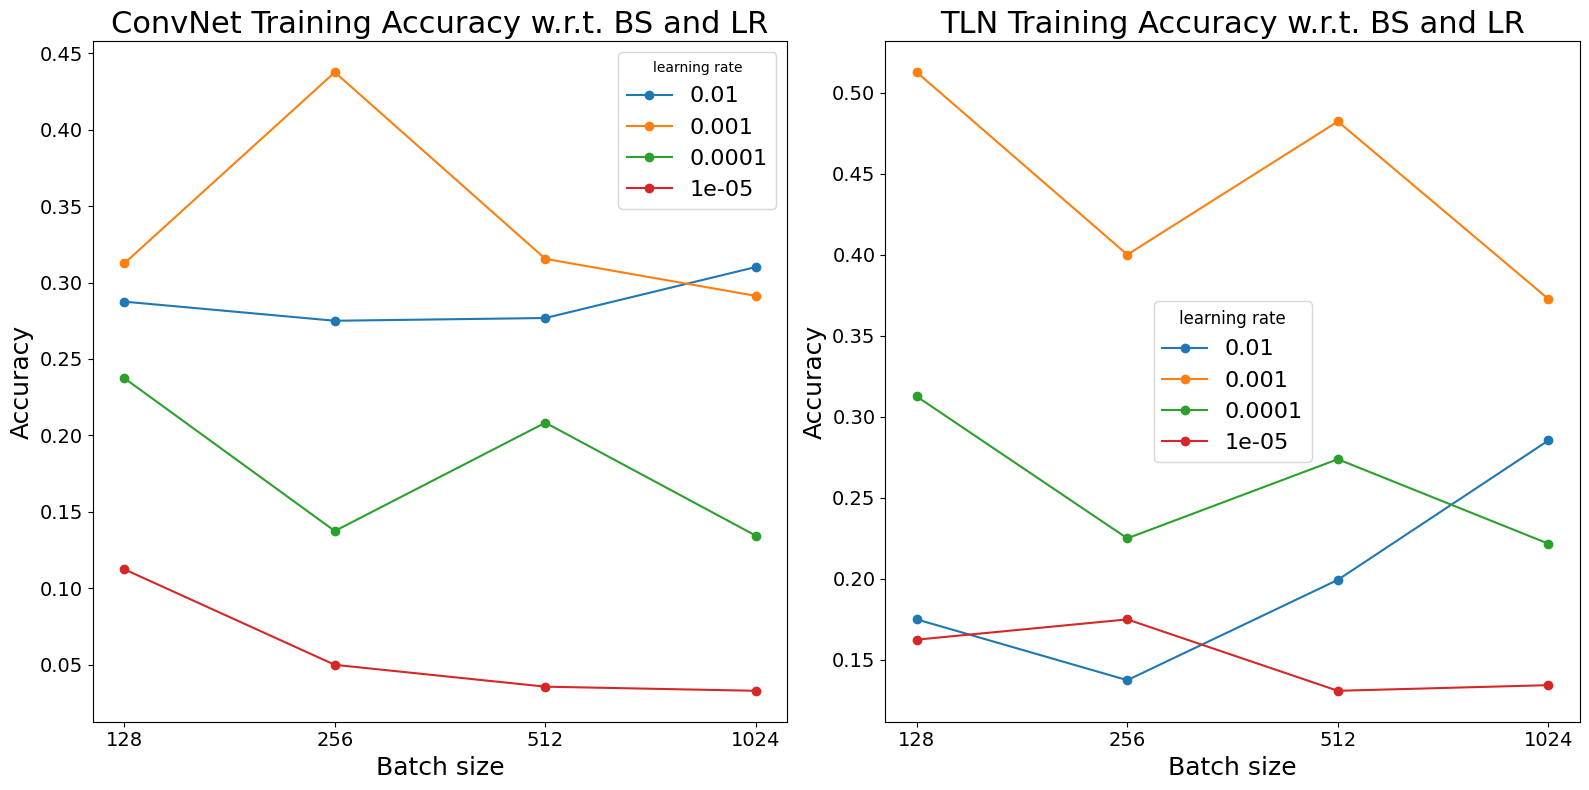

In [104]:
learning_rates = [0.01, 0.001, 0.0001, 0.00001]
batches = [128, 256, 512, 1024]

fig, ax = plt.subplots(figsize=(16,8))
plt.axis('off')

ax = fig.add_subplot(1, 2, 1)

ax.set_title("ConvNet Training Accuracy w.r.t. BS and LR",fontdict=dict(size=22))
ax.set_xlabel("Batch size",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(bs) for bs in batches]
for L in learning_rates:
    y = [results['train_acc'][-1] for results in tuned_hyperparams_results if results['LR'] == L]
    ax.plot(x, y, label=L,marker='o')
legend = ax.legend(title='learning rate',fontsize=16)
##########################################################################################################
ax = fig.add_subplot(1, 2, 2)

ax.set_title("TLN Training Accuracy w.r.t. BS and LR",fontdict=dict(size=22))
ax.set_xlabel("Batch size",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(bs) for bs in batches]
for L in learning_rates:
    y = [results['train_acc'][-1] for results in tuned_tln_results if results['LR'] == L]
    ax.plot(x, y, label=L,marker='o')
legend = ax.legend(title='learning rate',fontsize=16)
plt.setp(legend.get_title(),fontsize='large')
fig.tight_layout()
plt.show()
fig.savefig('Training Accuracy w.r.t. BS and LR ConvNet and TwoLayerNet.png', bbox_inches = 'tight')

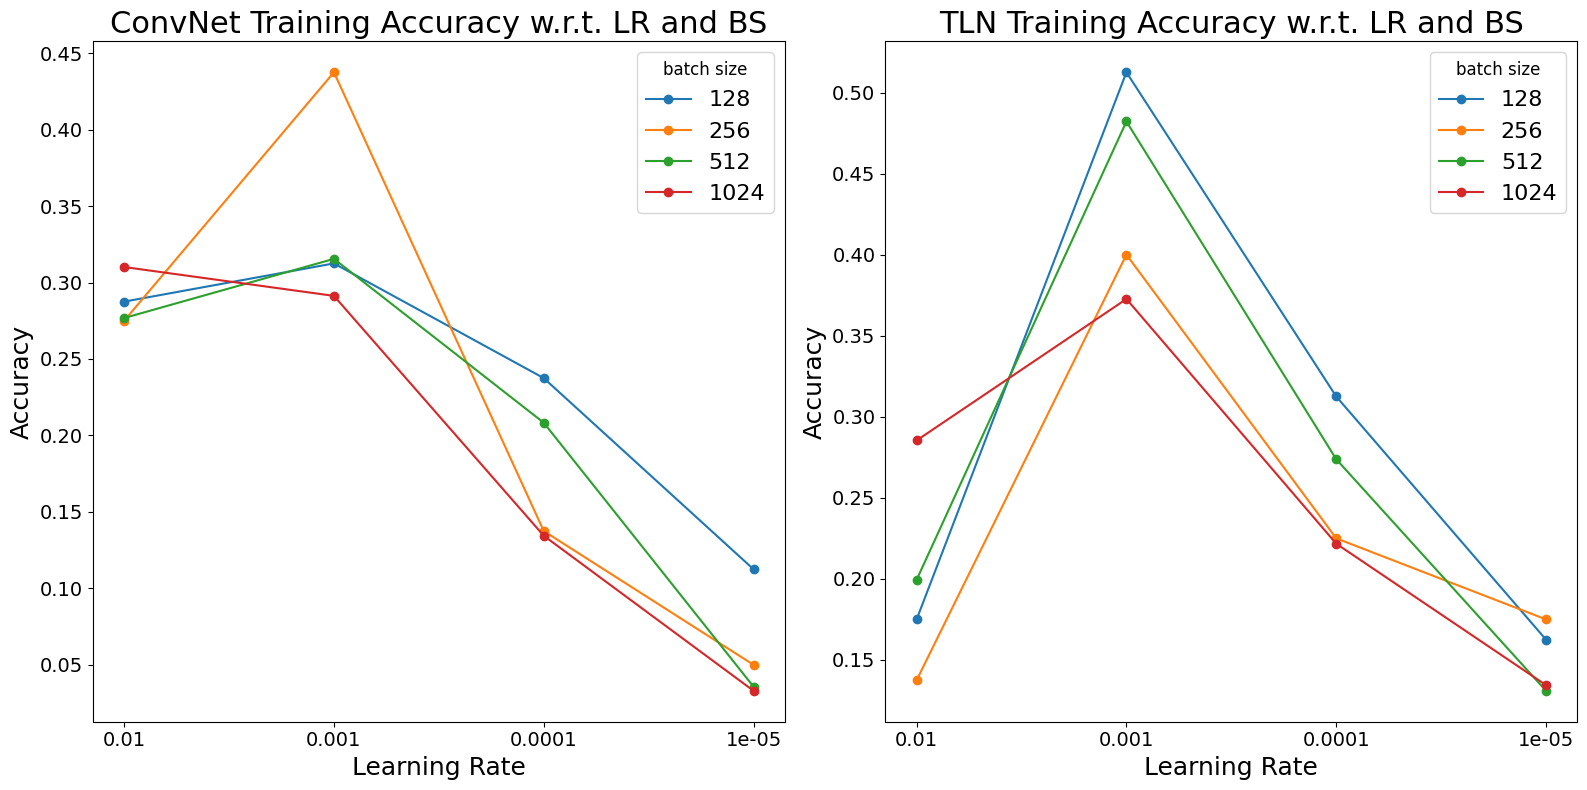

In [106]:
fig, ax = plt.subplots(figsize=(16,8))
plt.axis('off')

ax = fig.add_subplot(1, 2, 1)

ax.set_title("ConvNet Training Accuracy w.r.t. LR and BS",fontdict=dict(size=22))
ax.set_xlabel("Learning Rate",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(lr) for lr in learning_rates]

for B in batches:
    y = [results['train_acc'][-1] for results in tuned_hyperparams_results if results['Batches'] == B]
    ax.plot(x, y, label=B, marker='o')

legend = ax.legend(title='batch size',fontsize=16)
plt.setp(legend.get_title(),fontsize='large')

######################################################################################################
ax = fig.add_subplot(1, 2, 2)
ax.set_title("TLN Training Accuracy w.r.t. LR and BS",fontdict=dict(size=22))
ax.set_xlabel("Learning Rate",fontdict=dict(size=18))
ax.set_ylabel("Accuracy",fontdict=dict(size=18))
ax.tick_params(axis='both', which='major', labelsize=14)

x = [str(lr) for lr in learning_rates]

for B in batches:
    y = [results['train_acc'][-1] for results in tuned_tln_results if results['Batches'] == B]
    ax.plot(x, y, label=B, marker='o')

legend = ax.legend(title='batch size',fontsize=16)
plt.setp(legend.get_title(),fontsize='large')
fig.tight_layout()
plt.show()
fig.savefig('Training Accuracy w.r.t. LR and BS ConvNet and TwoLayerNet.png', bbox_inches = 'tight')

In [32]:
CNN_tuned_results.sort_values(by='train_acc',ascending=False)[:5]


train_acc  \
8   [0.046875, 0.0, 0.0, 0.0078125, 0.0078125, 0.0...   
4   [0.03125, 0.0, 0.0078125, 0.015625, 0.0078125,...   
9   [0.01953125, 0.00390625, 0.015625, 0.00390625,...   
12  [0.015625, 0.015625, 0.0, 0.015625, 0.0, 0.015...   
14  [0.013671875, 0.001953125, 0.005859375, 0.0078...   

                                           train_loss  \
8   [4.614810943603516, 4.61883020401001, 4.628477...   
4   [4.621066093444824, 4.638019561767578, 4.62720...   
9   [4.60975980758667, 4.616097927093506, 4.614946...   
12  [4.607578277587891, 4.598962783813477, 4.61516...   
14  [4.600724220275879, 4.611934185028076, 4.61119...   

                                                epoch       LR  Batches  
8   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.00010      128  
4   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.00100      128  
9   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.00010      256  
12  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.00001      128  
14  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  0.00001      512

#### *` test the accuracy of ConvNet `*

In [173]:
learning_rate = 0.001
batches = 256

trainloader = torch.utils.data.DataLoader(transform_train, batch_size=batches, shuffle=True)
testloader = torch.utils.data.DataLoader(transform_test, batch_size=512, shuffle=False)

model_CNN = ConvNet(input_channels=3, classes=100).to(device)
best_model_CNN, results = train(model_CNN, trainloader, lr=learning_rate, epochs=30, return_model=True)
torch.save(best_model_CNN.state_dict(), "./ConvNet_model")

results['test_acc'] = valid(best_model_CNN, testloader)
results['LR'] = learning_rate
results['Batches'] = batches
print(results['test_acc'])

with open("./final_stats_CNN.txt", "w") as f:
    f.write(json.dumps(results))
    f.write('\n')

Accuracy: 33 %
0.3391


In [177]:
results['test_acc'] = valid(best_model_CNN, testloader)
print(sum(results['train_acc'])/len(results['train_acc']))

Accuracy: 33 %
0.352155080782313


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
conf = valid_class(best_model, testloader, classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classes)
disp.plot()
disp.ax_.xaxis.set_label_position('top') 
disp.ax_.xaxis.tick_top()
disp.ax_.set_xticklabels(classes, rotation = 90)
disp.ax_.tick_params(labelbottom=False,labeltop=True)
disp.figure_.set_figwidth(25)
disp.figure_.set_figheight(25)
print()

#### *`test the accuracy of TwolayerNet`*

In [186]:
learning_rate = 0.001
batches = 128

input_size = 3*32*32
hidden_size = 400
num_classes = 100

trainloader = torch.utils.data.DataLoader(transform_train, batch_size=batches, shuffle=True)
testloader = torch.utils.data.DataLoader(transform_test, batch_size=256, shuffle=False)


model_TLN = TwoLayerNet(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_classes=num_classes).to(device)
best_model_TLN, results = train(model_TLN, trainloader, lr=learning_rate, epochs=25, return_model=True)
torch.save(best_model_TLN.state_dict(), "./TwoLayerNet_model")

results['test_acc'] = valid(best_model_TLN, testloader)
results['LR'] = learning_rate
results['Batches'] = batches
print(results['test_acc'])

with open("./final_stats_TLN.txt", "w") as f:
    f.write(json.dumps(results))
    f.write('\n')

Accuracy: 22 %
0.2281


In [187]:
results['test_acc'] = valid(best_model_TLN, testloader)
print(sum(results['train_acc'])/len(results['train_acc']))

Accuracy: 22 %
0.49155338874680304


## **Session 2:  Finetuning the ConvNet**
### 2.1 STL-10 DATASET
> The above networks are trained on CIFAR-100, which
contains the images of 100 different object categories, each of which has $32\times32 \times3$ dimensions. 
The dataset we use throughout this session is a subset of [STL-10](https://cs.stanford.edu/~acoates/stl10/)
with higher resolution and different object classes. So, there is a discrepancy between the previous dataset (CIFAR-100) and the new dataset (STL-10). One solution would be to train the whole network from scratch. However, the number of parameters is too large to be trained properly with such few images. Another way is to use the pre-trained network (on CIFAR-100) and then finetune the network on the new dataset (STL-10) (*e.g.*, use the same architectures in all layers except the output layer, as the number of output classes changes (from 100 to 5)).


In [114]:
# Use the following codes if necessary
# referenced codes: https://cs.stanford.edu/~acoates/stl10/

from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1
    

sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


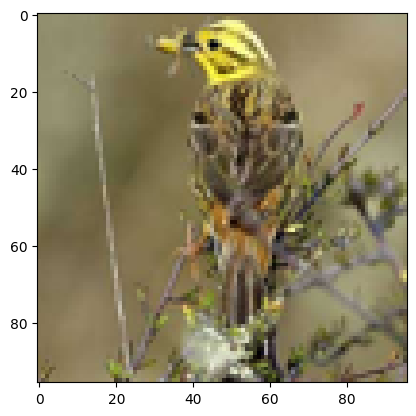

(5000, 96, 96, 3)
torch.Size([5])


In [115]:

# Use the following codes if necessary

# download data if needed
download_and_extract()

# # test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

# # test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

# labels = read_labels(LABEL_PATH)
print(labels.shape)

# # save images to disk
# save_images(images, labels)

#### **`Q2.1 Create the STL10_Dataset (5-pts)`**
In this Session, download STL-10 and extract 5 classes from STL-10 training dataset. The the labels of images will be defined as: 

`{1: 'car',2:'deer',3:'horse',4:'monkey',5:'truck'}`

 Extract mentioned 5 classes of images from STL-10. Complement *`STL10_Dataset`* class and match each class with the label accordingly. Hint: You can use the codes above to help to complement *`STL10_Dataset`* class. (5-pts)


airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck.


In [116]:
class STL10_Dataset(Dataset):

    def __init__(self, root, train=True, transform = None):
        
        mapping = {3:0, 5:1, 7:2, 8:3, 10:4}  
        
        if train:
            path=root+'/stl10_binary/train_'
        else:
            path=root+'/stl10_binary/test_'
        
        images = read_all_images(path + 'X.bin')
        labels = read_labels(path + 'y.bin')
        
        self.data = [
            (image, mapping[label]) for image,label in zip(images,labels) if label in mapping.keys()
        ]
        
        self.transform = transform
                
    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):

        img, target = self.data[item]
        img = Image.fromarray(img)

        if self.transform:
            img = self.transform(img)       

        return img, target



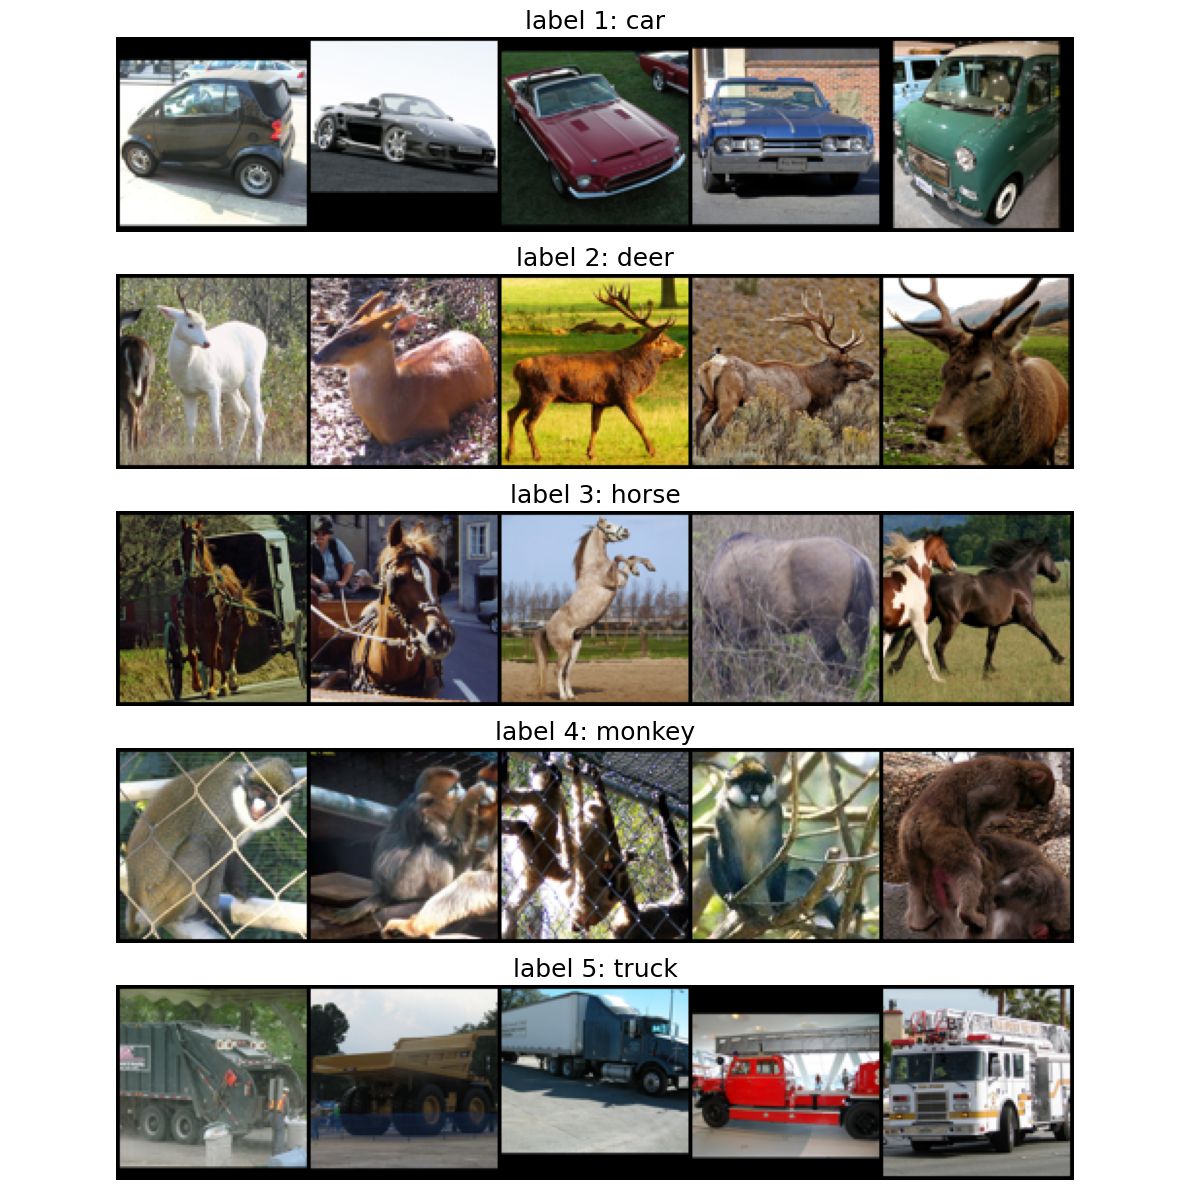

In [123]:
class_name = {0: 'car', 1:'deer', 2:'horse', 3:'monkey', 4:'truck'}

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = STL10_Dataset(root='./data', train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)

# Samples of images of each of 5 classes
sample_imgs = {0:[], 1:[], 2:[], 3:[], 4:[]}

# Find the first 5 classes
label_range = range(5)

# Track which class we found
found_class = np.zeros(5)

# Amount of images per class to visualize
imgs_per_class=5

# Loop until all images of the desires labels are found (at least once)
while not np.all(found_class > imgs_per_class):
    for (images, labels) in trainloader:
        for i, label in enumerate(labels):
            # Append image to collection of image_samples
            sample_imgs[label.item()].append(images[i]) # must be H x W x C

            # Check if this is one of the desired image labels
            if label in label_range: # and not found[l]:
                found_class[label] += 1 

fig, ax = plt.subplots(figsize=(12,12))
plt.axis('off')
fig.tight_layout()
for i, l in enumerate(label_range):
    ax = fig.add_subplot(len(label_range), 1, i+1)
    ax.axis('off')
    ax.set_title("label {n}: {l}".format(n=l+1, l=class_name[l]),fontdict=dict(size=18))
    
    img = torchvision.utils.make_grid(torch.stack(sample_imgs[l][:imgs_per_class], axis=0), normalize=True)
    img = np.transpose(img, (1, 2, 0)) # Shape (3, 100, 492) -> (100, 492, 3)
    ax.imshow(img)
fig.tight_layout()
fig.savefig('STL10 Dataset.png', bbox_inches = 'tight')

### 2.2 Fine-tuning ConvNet
You should load the pre-trained parameters and modify the output layer of pre-trained ConvNet from 100 to 5. You can either load the pre-trained parameters and then modify the output layer, or change the output layer firstly and then load the matched pre-trained parameters. The examples can be found at [link1](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) and [link2](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).


#### **`Q2.2  Finetuning from ConvNet (10-pts)`**
1. Load the pre-trained parameters (pretrained on CIFAR-100) and modify the ConvNet. (5-pts)
2. Train the model and show the results (settings of hyperparameters, accuracy, learning curve). (5-pts)

**Hint**:  Once the network is trained, it is a good practice to understand the feature space by visualization techniques. There are several techniques to visualize the feature space. [**t-sne**](https://lvdmaaten.github.io/tsne/) is a dimensionality reduction method which can help you better understand the feature learning process.

In [138]:
# load_pretrained model
def pretrained_model(modelpath):
    model = ConvNet(input_channels=3, classes=100)
    model.load_state_dict(torch.load(modelpath))
    
    model.fc1 = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(7056, 441),    # 16*(21*21) = 7,056
                    nn.ReLU(),
                    nn.Linear(441,120),
                    nn.ReLU())
                    
        
    model.fc2 = nn.Sequential(
                    nn.Linear(120, 84),
                    nn.ReLU())       
        
    model.fc3 = nn.Linear(84, 5)

    return model

In [139]:
RS = transforms.Resize(96)
CC = transforms.CenterCrop(96)
TT = transforms.ToTensor()
NRM = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

transformations = transforms.Compose([RS,CC,TT,NRM])

STL_trainset = STL10_Dataset(root='./data', train=True, transform=transformations)
STL_testset = STL10_Dataset(root='./data', train=False, transform=transformations)


In [140]:
learn_rate = 0.001
batches = 128

trainloader = torch.utils.data.DataLoader(STL_trainset, batch_size=batches, shuffle=True)
testloader = torch.utils.data.DataLoader(STL_testset, batch_size=512, shuffle=False)

model = pretrained_model("./ConvNet_model").to(device)
# model = ConvNet(input_channels=3, classes=5).to(device)
best_model, results_STL = train(model, trainloader, epochs=50, lr=learn_rate, return_model=True)
torch.save(best_model.state_dict(), "./ConvNetSTL10_model")

results_STL['accuracy'] = valid(best_model, testloader)
results_STL['learn_rate'] = learn_rate
results_STL['batches'] = batches
print(results_STL['accuracy'])


# Save stats
with open("./final_stats_CNN_STL10.txt", "w") as f:
    f.write(json.dumps(results_STL))
    f.write('\n')

Accuracy: 76 %
0.76175


C:\Users\kreme\AppData\Local\Temp\ipykernel_66640\1585859393.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_matrix = np.zeros((len(classes), len(classes)), dtype=np.int)


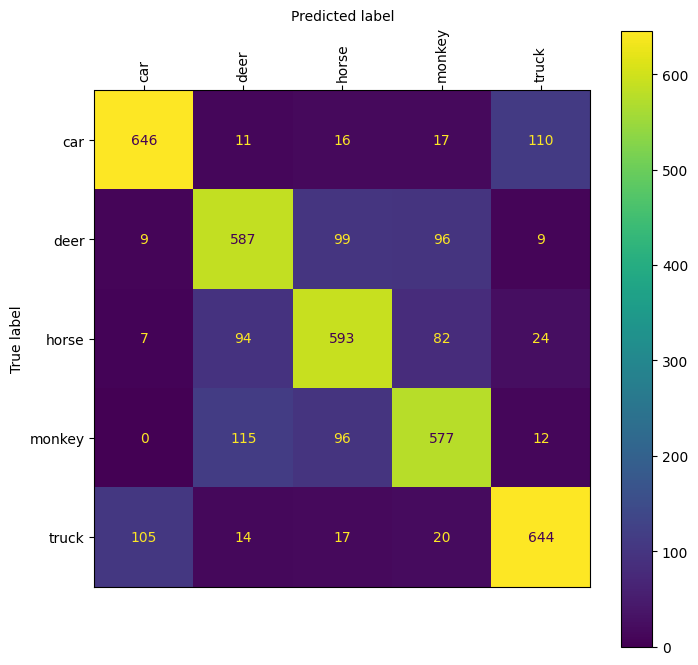

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
conf = valid_class(model, testloader, class_name)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=class_name.values())
disp.plot()
disp.ax_.xaxis.set_label_position('top') 
disp.ax_.xaxis.tick_top()
disp.ax_.set_xticklabels(class_name.values(), rotation = 90)
disp.ax_.tick_params(labelbottom=False,labeltop=True)
disp.figure_.set_figwidth(8)
disp.figure_.set_figheight(8)
plt.savefig("STL-10 Predictions Confusion Matrix.png", bbox_inches = 'tight')

###  **`Bonus (optional)`**
Play with the code and try to get a higher accuracy on the test dataset (5 class from STL-10) as high as you can. The only data you can use is from CIFAR-100 and SLT-10. The higher accuracy among all teams can get extra points. Specifically, **1st:** *5-pts*, **2nd and 3rd:** *4-pts*, **4th and 5th:** *3-pts*, **6th and 7th:** *2-pts*, **8th-10th:** *1-pts*. You can adjust the hyperparameters and changing structures. Your strategies should be described and explained in your report.

*Please do not use external well-defined networks and please do not add more than 3 additional (beyond the original network) convolutional layers.*

**Hints**:
*   Data augmentation
*   Grid Search
*   Freezing early layers
*   Modifying Architecture
*   Modifying hyperparameters, *etc*.
*   [Other advice](https://cs231n.github.io/transfer-learning/)

In [ ]:
################################
# Todo: finish the code
################################